In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.inspection import permutation_importance

warnings.filterwarnings('ignore')
%matplotlib inline



In [10]:
df = pd.read_csv("C:\\Users\\sulai\\Downloads\\kaggle\\GOOGL_2004-08-01_2024-12-18.csv")

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044
...,...,...,...,...,...,...,...
5113,2024-12-11,185.309998,195.610001,184.850006,195.399994,195.399994,67894100
5114,2024-12-12,195.000000,195.179993,191.710007,191.960007,191.960007,34817500
5115,2024-12-13,191.009995,192.729996,189.639999,189.820007,189.820007,25143500
5116,2024-12-16,192.869995,199.000000,192.619995,196.660004,196.660004,44934900


# Data cleaning and preprocessing

In [17]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['Date']

0      2004-08-19
1      2004-08-20
2      2004-08-23
3      2004-08-24
4      2004-08-25
          ...    
5113   2024-12-11
5114   2024-12-12
5115   2024-12-13
5116   2024-12-16
5117   2024-12-17
Name: Date, Length: 5118, dtype: datetime64[ns]

In [21]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Exploratory Data Analysis

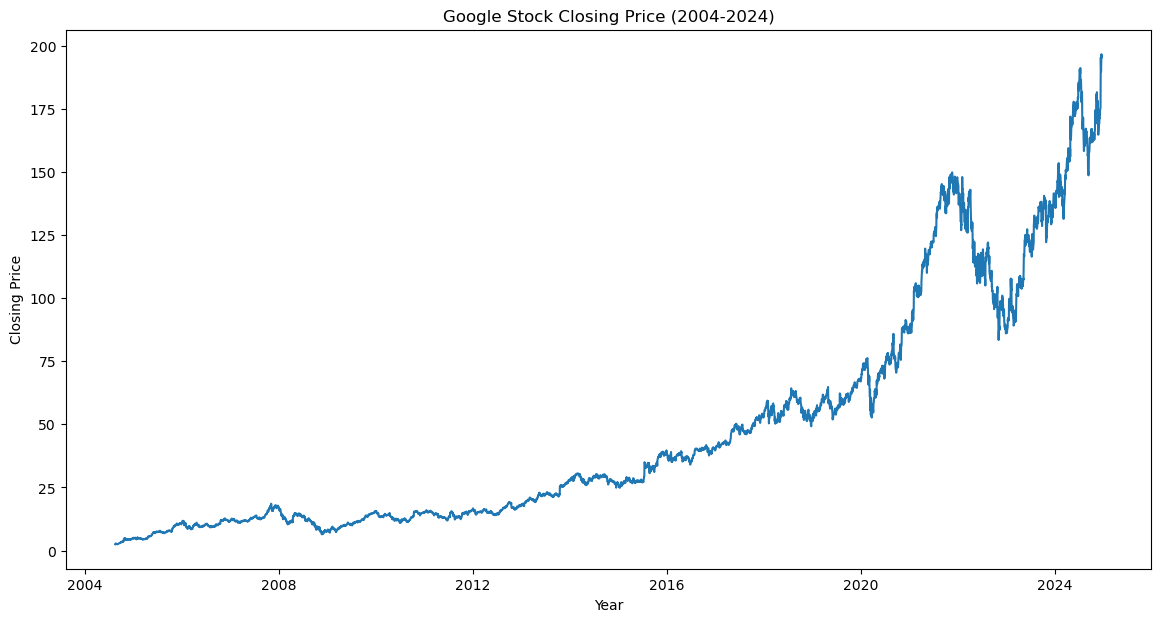

In [24]:
# Plotting the closing price over time
plt.figure(figsize=(14,7))
sns.lineplot(x='Date', y='Close', data=df)
plt.title("Google Stock Closing Price (2004-2024)")
plt.xlabel("Year")
plt.ylabel('Closing Price')
plt.show()

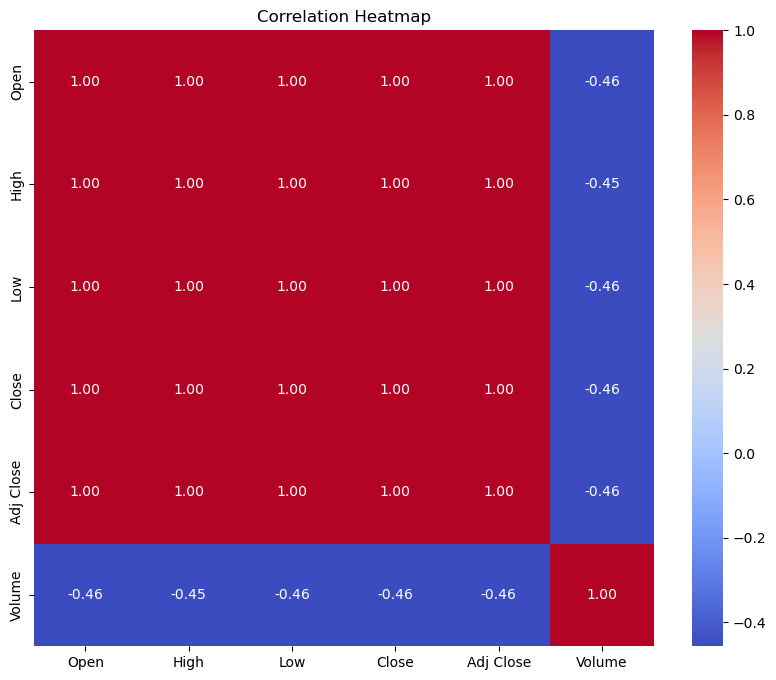

In [34]:
# Correlation heatmap
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot = True, cmap='coolwarm', fmt='.2f') #
plt.title('Correlation Heatmap')
plt.show()
#fmt='.2f': Formats the correlation values to 2 decimal places.
#annot=True: Displays the correlation values within the heatmap.


## Feature Engineering

In [41]:
# Create additional features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
# Calculate daily price change
df['Daily_Change'] = df['Close'] - df['Open']



* df['Year'] = df['Date'].dt.year: Extracts the year from the Date column and creates a new column Year with the year values.
* df['Month'] = df['Date'].dt.month: Extracts the month from the Date column and creates a new column Month with the month values.
* df['Day'] = df['Date'].dt.day: Extracts the day of the month from the Date column and creates a new column Day with the day values.
* df['DayOfWeek'] = df['Date'].dt.dayofweek: Extracts the day of the week (0 = Monday, 6 = Sunday) from the Date column and creates a new column DayOfWeek with these values.

In [44]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek,Daily_Change
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,2004,8,19,3,0.008508
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,2004,8,20,4,0.182682
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,2004,8,23,0,-0.033784
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,2004,8,24,1,-0.159410
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,2004,8,25,2,0.026026


## Predictive Modeling

In [46]:
# Define features and target
features = ['Open','High','Low','Adj Close', 'Volume', 'Year', 'Month', 'Day', 'DayOfWeek']
target = 'Close'

In [48]:
# Split the data
X = df[features]
y = df[target]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [55]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.03775942198076
R-squared: 0.9999820105567767


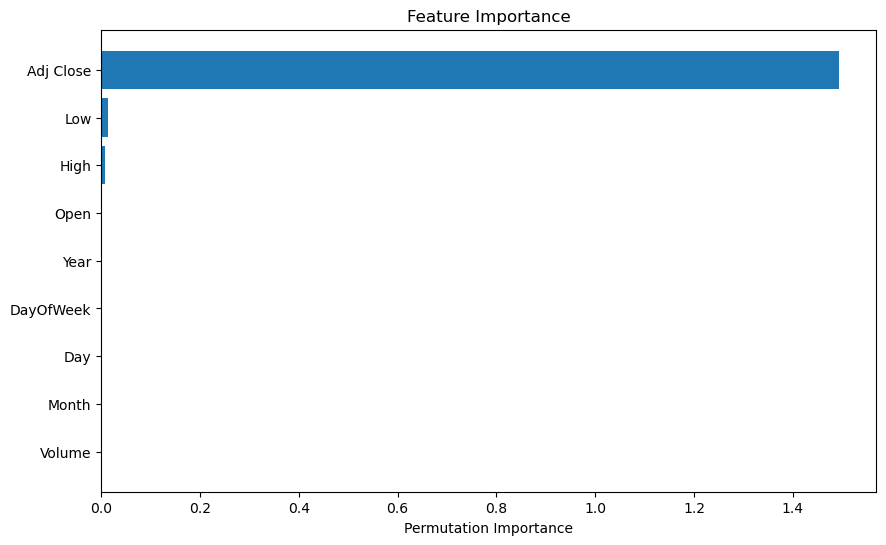

In [57]:
# Permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()

### Discussion

In this notebook, we explored Google's stock data over a 20-year period, engineered features, and built a predictive model using a Random Forest Regressor. The model's performance, as indicated by the R-squared value, suggests a reasonable fit, though there is always room for improvement.

**Credits**
This notebook was created with the help of https://devra.ai/ref/kaggle